# 1. Importación de Librerías

Esta sección importa todas las bibliotecas necesarias para el análisis:

- **pandas**: Para manejo de datos tabulares
- **numpy**: Para operaciones numéricas
- **matplotlib**: Para la creación de gráficos
- **seaborn**: Para gráficos estadísticos avanzados

También configura la semilla aleatoria para asegurar reproducibilidad en la generación de datos.

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
np.random.seed(42)  # Para reproducibilidad

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


# 2. Generación de Datos Sintéticos

En esta sección se crean tres conjuntos de datos sintéticos:

1. **Estudiantes**: Información básica de 200 estudiantes de la Universidad de Deusto
   - ID, nombre, apellido, edad, género, programa académico y año de ingreso

2. **Asignaturas**: Catálogo de 20 asignaturas
   - ID, nombre, créditos y programa al que pertenecen

3. **Notas**: Registro de calificaciones de estudiantes
   - ID de estudiante, ID de asignatura, nota obtenida y semestre cursado

Los datos generados se guardan en archivos CSV para su posterior análisis.

In [3]:
# Generar datos de estudiantes
n_estudiantes = 200

# Crear DataFrame de Estudiantes
estudiantes = pd.DataFrame({
    'ID_Estudiante': range(1, n_estudiantes + 1),
    'Nombre': [f'Estudiante_{i}' for i in range(1, n_estudiantes + 1)],
    'Apellido': [f'Apellido_{i}' for i in range(1, n_estudiantes + 1)],
    'Edad': np.random.randint(18, 30, n_estudiantes),
    'Género': np.random.choice(['Masculino', 'Femenino', 'Otro'], n_estudiantes),
    'Programa': np.random.choice(['Ingeniería', 'Derecho', 'Economía', 'Comunicación', 'Psicología'], n_estudiantes),
    'Año_Ingreso': np.random.randint(2018, 2024, n_estudiantes)
})

# Generar datos de asignaturas
asignaturas = pd.DataFrame({
    'ID_Asignatura': range(1, 21),
    'Nombre_Asignatura': [
        'Matemáticas Avanzadas', 'Derecho Constitucional', 'Microeconomía', 
        'Comunicación Digital', 'Psicología Cognitiva', 'Programación', 
        'Redes de Computadoras', 'Derecho Mercantil', 'Macroeconomía', 
        'Periodismo Digital', 'Psicología Social', 'Álgebra Lineal',
        'Derecho Penal', 'Finanzas Corporativas', 'Teoría de la Comunicación',
        'Psicología del Desarrollo', 'Estructuras de Datos', 'Bases de Datos',
        'Derecho Internacional', 'Marketing Digital'
    ],
    'Créditos': np.random.randint(3, 7, 20),
    'Programa': np.random.choice(['Ingeniería', 'Derecho', 'Economía', 'Comunicación', 'Psicología'], 20)
})

# Generar datos de notas
notas = pd.DataFrame({
    'ID_Estudiante': np.random.choice(estudiantes['ID_Estudiante'], n_estudiantes * 5),
    'ID_Asignatura': np.random.choice(asignaturas['ID_Asignatura'], n_estudiantes * 5),
    'Nota': np.round(np.random.normal(7, 2, n_estudiantes * 5), 2),
    'Semestre': np.random.choice(['2022-1', '2022-2', '2023-1', '2023-2'], n_estudiantes * 5)
})

# Asegurar que las notas estén entre 0 y 10
notas['Nota'] = np.clip(notas['Nota'], 0, 10)

# Exportar a CSV
estudiantes.to_csv('estudiantes_deusto.csv', index=False)
asignaturas.to_csv('asignaturas_deusto.csv', index=False)
notas.to_csv('notas_deusto.csv', index=False)

print("Datasets generados y exportados correctamente.")

Datasets generados y exportados correctamente.


# 3. Carga de Datos

En esta sección se cargan los conjuntos de datos generados y se muestra información básica sobre ellos:

- Dimensiones de cada conjunto de datos (filas y columnas)
- Tipos de datos en cada columna
- Primeras 5 filas para entender la estructura de los datos

Esto nos permite verificar que los datos se hayan generado correctamente y entender su estructura antes de realizar análisis más profundos.

In [4]:
# Cargar datasets
estudiantes = pd.read_csv('estudiantes_deusto.csv')
asignaturas = pd.read_csv('asignaturas_deusto.csv')
notas = pd.read_csv('notas_deusto.csv')

# Mostrar información básica de los datasets
print("Información de Estudiantes:")
print(estudiantes.info())
print("\nPrimeras 5 filas de Estudiantes:")
print(estudiantes.head())

print("\nInformación de Asignaturas:")
print(asignaturas.info())
print("\nPrimeras 5 filas de Asignaturas:")
print(asignaturas.head())

print("\nInformación de Notas:")
print(notas.info())
print("\nPrimeras 5 filas de Notas:")
print(notas.head())

Información de Estudiantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Estudiante  200 non-null    int64 
 1   Nombre         200 non-null    object
 2   Apellido       200 non-null    object
 3   Edad           200 non-null    int64 
 4   Género         200 non-null    object
 5   Programa       200 non-null    object
 6   Año_Ingreso    200 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 11.1+ KB
None

Primeras 5 filas de Estudiantes:
   ID_Estudiante        Nombre    Apellido  Edad     Género      Programa  \
0              1  Estudiante_1  Apellido_1    24       Otro  Comunicación   
1              2  Estudiante_2  Apellido_2    21       Otro      Economía   
2              3  Estudiante_3  Apellido_3    28   Femenino  Comunicación   
3              4  Estudiante_4  Apellido_4    25  Masculino       Derecho   
4     

# 4. Verificación y Tratamiento de Valores Faltantes

Esta sección se enfoca en:

1. **Verificar** si existen valores faltantes en los conjuntos de datos
2. **Crear artificialmente** algunos valores faltantes para demostrar técnicas de tratamiento
3. **Tratar los valores faltantes** utilizando métodos estadísticos:
   - Reemplazo de edades faltantes con la mediana
   - Reemplazo de notas faltantes con la media

Este paso es fundamental en cualquier análisis de datos, ya que los valores faltantes pueden afectar significativamente los resultados del análisis.

In [5]:
# Comprobar valores faltantes
print("Valores faltantes en Estudiantes:")
print(estudiantes.isnull().sum())

print("\nValores faltantes en Asignaturas:")
print(asignaturas.isnull().sum())

print("\nValores faltantes en Notas:")
print(notas.isnull().sum())

# Añadir algunos valores faltantes para demostrar cómo tratarlos
# (En datos reales, este paso no se haría, pero es útil para la demostración)
estudiantes.loc[10:15, 'Edad'] = np.nan
notas.loc[20:25, 'Nota'] = np.nan

print("\nValores faltantes después de inserción artificial (para demostración):")
print("Estudiantes:", estudiantes.isnull().sum())
print("Notas:", notas.isnull().sum())

# Tratamiento de valores faltantes
# Reemplazar edades faltantes con la mediana
edad_mediana = estudiantes['Edad'].median()
estudiantes['Edad'].fillna(edad_mediana, inplace=True)

# Reemplazar notas faltantes con la media
nota_media = notas['Nota'].mean()
notas['Nota'].fillna(nota_media, inplace=True)

print("\nValores faltantes después de tratamiento:")
print("Estudiantes:", estudiantes.isnull().sum())
print("Notas:", notas.isnull().sum())

Valores faltantes en Estudiantes:
ID_Estudiante    0
Nombre           0
Apellido         0
Edad             0
Género           0
Programa         0
Año_Ingreso      0
dtype: int64

Valores faltantes en Asignaturas:
ID_Asignatura        0
Nombre_Asignatura    0
Créditos             0
Programa             0
dtype: int64

Valores faltantes en Notas:
ID_Estudiante    0
ID_Asignatura    0
Nota             0
Semestre         0
dtype: int64

Valores faltantes después de inserción artificial (para demostración):
Estudiantes: ID_Estudiante    0
Nombre           0
Apellido         0
Edad             6
Género           0
Programa         0
Año_Ingreso      0
dtype: int64
Notas: ID_Estudiante    0
ID_Asignatura    0
Nota             6
Semestre         0
dtype: int64

Valores faltantes después de tratamiento:
Estudiantes: ID_Estudiante    0
Nombre           0
Apellido         0
Edad             0
Género           0
Programa         0
Año_Ingreso      0
dtype: int64
Notas: ID_Estudiante    0
ID_Asig

C:\Users\Deusto\AppData\Local\Temp\ipykernel_2536\3727653037.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  estudiantes['Edad'].fillna(edad_mediana, inplace=True)
C:\Users\Deusto\AppData\Local\Temp\ipykernel_2536\3727653037.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


# 5. Detección y Eliminación de Duplicados

En esta sección se abordan los siguientes aspectos:

1. **Verificar** la existencia de datos duplicados en cada conjunto de datos
2. **Crear artificialmente** algunos duplicados para demostrar la detección
3. **Eliminar los datos duplicados** para asegurar la calidad del análisis

La presencia de duplicados puede distorsionar los resultados del análisis, especialmente en cálculos estadísticos y visualizaciones, por lo que es importante identificarlos y eliminarlos.

In [6]:
# Verificar y eliminar duplicados
print("Duplicados en Estudiantes:", estudiantes.duplicated().sum())
print("Duplicados en Asignaturas:", asignaturas.duplicated().sum())
print("Duplicados en Notas:", notas.duplicated().sum())

# Crear algunos duplicados artificiales para demostración
estudiantes = pd.concat([estudiantes, estudiantes.iloc[0:5]])
notas = pd.concat([notas, notas.iloc[0:10]])

print("\nDuplicados después de inserción artificial:")
print("Estudiantes:", estudiantes.duplicated().sum())
print("Notas:", notas.duplicated().sum())

# Eliminar duplicados
estudiantes.drop_duplicates(inplace=True)
asignaturas.drop_duplicates(inplace=True)
notas.drop_duplicates(inplace=True)

print("\nDuplicados después de limpieza:")
print("Estudiantes:", estudiantes.duplicated().sum())
print("Asignaturas:", asignaturas.duplicated().sum())
print("Notas:", notas.duplicated().sum())

Duplicados en Estudiantes: 0
Duplicados en Asignaturas: 0
Duplicados en Notas: 0

Duplicados después de inserción artificial:
Estudiantes: 5
Notas: 10

Duplicados después de limpieza:
Estudiantes: 0
Asignaturas: 0
Notas: 0


# 6. Estadísticas Descriptivas

En esta sección se calculan estadísticas descriptivas para entender mejor los datos:

1. **Estadísticas generales** de edad y notas:
   - Media, mediana, desviación estándar, mínimo, máximo, etc.

2. **Estadísticas por categorías**:
   - Distribución de edades por programa académico
   - Distribución de estudiantes por género
   - Distribución de estudiantes por programa
   - Notas promedio por programa
   - Notas promedio por semestre
   - Análisis cruzado de notas por programa y semestre

Estas estadísticas nos permiten obtener una comprensión más profunda de los patrones y tendencias en los datos.

In [7]:
# Estadísticas descriptivas de Estudiantes
print("Estadísticas de Edad:")
print(estudiantes['Edad'].describe())

print("\nEstadísticas de Edad por Programa:")
print(estudiantes.groupby('Programa')['Edad'].describe())

print("\nConteo por Género:")
print(estudiantes['Género'].value_counts())

print("\nConteo por Programa:")
print(estudiantes['Programa'].value_counts())

# Estadísticas descriptivas de Notas
print("\nEstadísticas de Notas:")
print(notas['Nota'].describe())

# Estadísticas de notas por programa
notas_con_programa = notas.merge(estudiantes[['ID_Estudiante', 'Programa']], on='ID_Estudiante')
print("\nNotas promedio por Programa:")
print(notas_con_programa.groupby('Programa')['Nota'].mean())

# Estadísticas por semestre
print("\nNotas promedio por Semestre:")
print(notas.groupby('Semestre')['Nota'].mean())

# Análisis más detallado - promedio de notas por Programa y Semestre
print("\nNotas promedio por Programa y Semestre:")
print(notas_con_programa.groupby(['Programa', 'Semestre'])['Nota'].mean().unstack())

Estadísticas de Edad:
count    200.000000
mean      24.000000
std        3.465552
min       18.000000
25%       21.000000
50%       24.000000
75%       27.000000
max       29.000000
Name: Edad, dtype: float64

Estadísticas de Edad por Programa:
              count       mean       std   min   25%   50%   75%   max
Programa                                                              
Comunicación   43.0  24.162791  3.715670  18.0  21.5  24.0  27.5  29.0
Derecho        42.0  24.380952  3.319950  18.0  22.0  25.0  27.0  29.0
Economía       31.0  24.161290  3.367460  18.0  21.5  24.0  26.5  29.0
Ingeniería     37.0  23.891892  3.281123  18.0  22.0  24.0  27.0  29.0
Psicología     47.0  23.489362  3.640786  18.0  20.0  23.0  26.5  29.0

Conteo por Género:
Género
Masculino    70
Otro         65
Femenino     65
Name: count, dtype: int64

Conteo por Programa:
Programa
Psicología      47
Comunicación    43
Derecho         42
Ingeniería      37
Economía        31
Name: count, dtype: int64

Esta

# 7. Visualización de Datos - Parte 1: Características Demográficas

Esta sección crea visualizaciones centradas en las características demográficas de los estudiantes:

1. **Histograma de Edades**:
   - Muestra la distribución de edades de los estudiantes
   - Permite identificar rangos de edad más comunes

2. **Gráfico de Barras de Programas**:
   - Visualiza la distribución de estudiantes por programa académico
   - Facilita la comparación del tamaño de cada programa

3. **Gráfico Circular de Género**:
   - Representa la proporción de estudiantes por género
   - Muestra los porcentajes de cada categoría

Las visualizaciones se guardan como archivos PNG para su posterior inclusión en reportes.

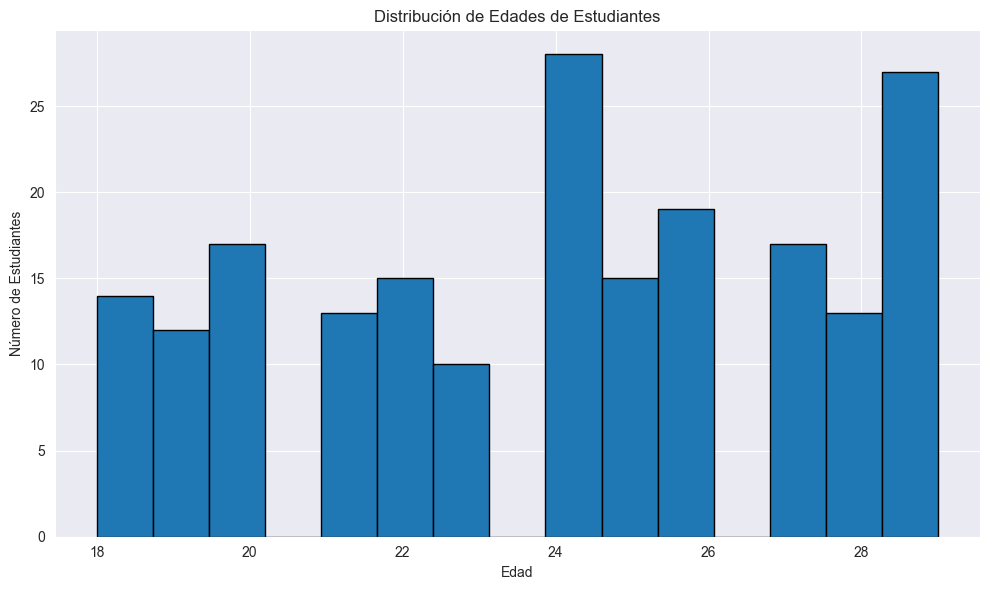

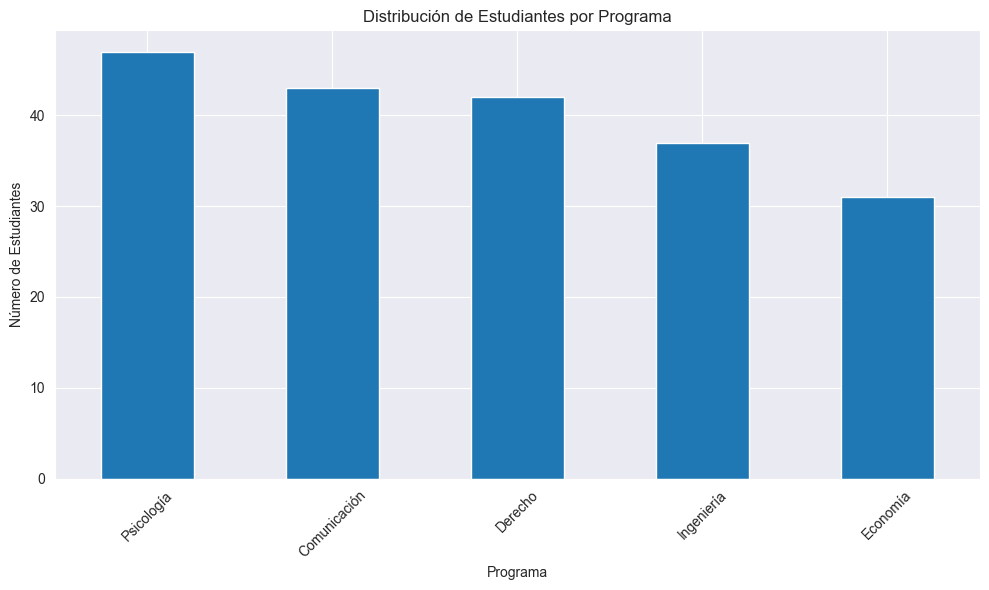

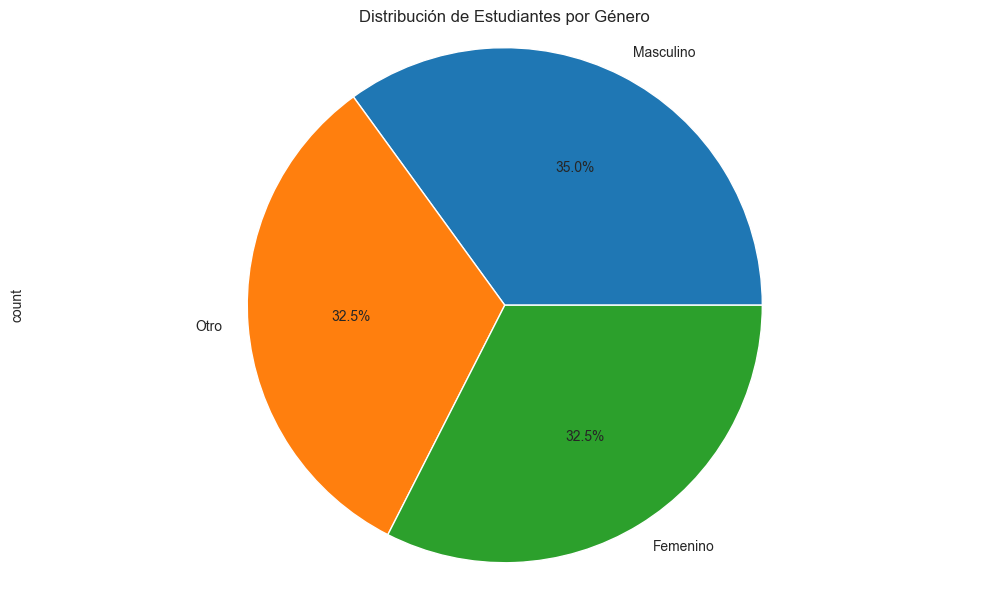

In [9]:
# Distribución de Edades
plt.figure(figsize=(10, 6))
estudiantes['Edad'].hist(bins=15, edgecolor='black')
plt.title('Distribución de Edades de Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Número de Estudiantes')
plt.tight_layout()
plt.savefig('distribucion_edades.png')
plt.show()

# Distribución de Estudiantes por Programa
plt.figure(figsize=(10, 6))
estudiantes['Programa'].value_counts().plot(kind='bar')
plt.title('Distribución de Estudiantes por Programa')
plt.xlabel('Programa')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distribucion_programas.png')
plt.show()

# Distribución de Estudiantes por Género
plt.figure(figsize=(10, 6))
estudiantes['Género'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Estudiantes por Género')
plt.axis('equal')
plt.tight_layout()
plt.savefig('distribucion_genero.png')
plt.show()

# 8. Visualización de Datos - Parte 2: Análisis de Rendimiento Académico

Esta sección crea visualizaciones enfocadas en el rendimiento académico:

1. **Histograma de Notas**:
   - Muestra la distribución general de notas
   - Permite identificar patrones y tendencias en las calificaciones

2. **Diagrama de Caja (Boxplot) por Programa**:
   - Compara la distribución de notas entre diferentes programas académicos
   - Facilita la identificación de programas con mayor/menor rendimiento y variabilidad

3. **Gráfico de Barras de Notas por Semestre**:
   - Visualiza la evolución del rendimiento académico a lo largo de diferentes semestres
   - Permite detectar tendencias temporales en las calificaciones

Estas visualizaciones ayudan a comprender mejor los patrones de rendimiento académico en la institución.


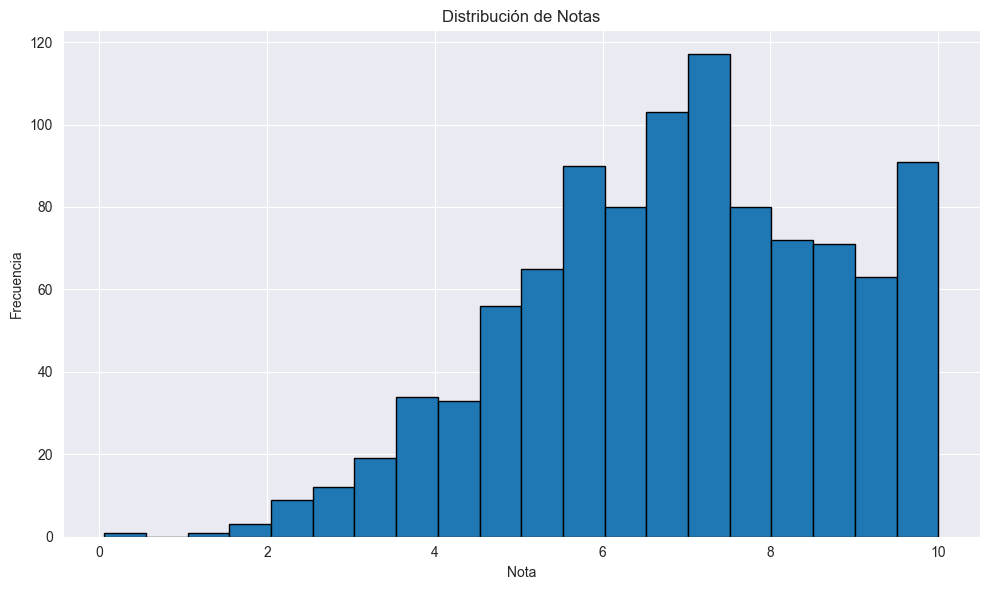

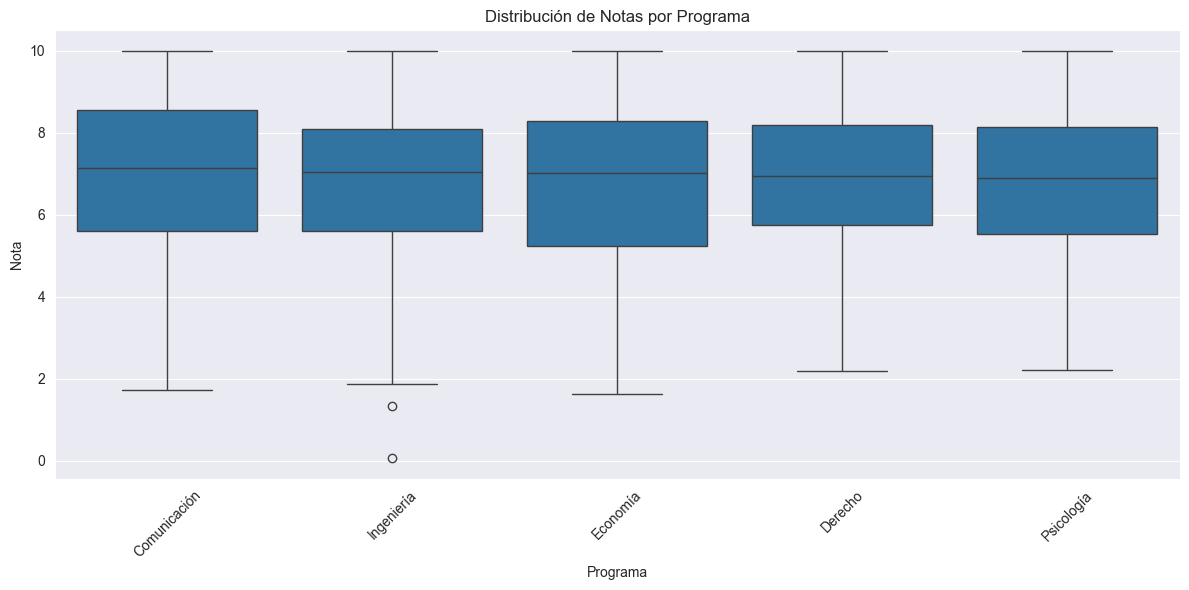

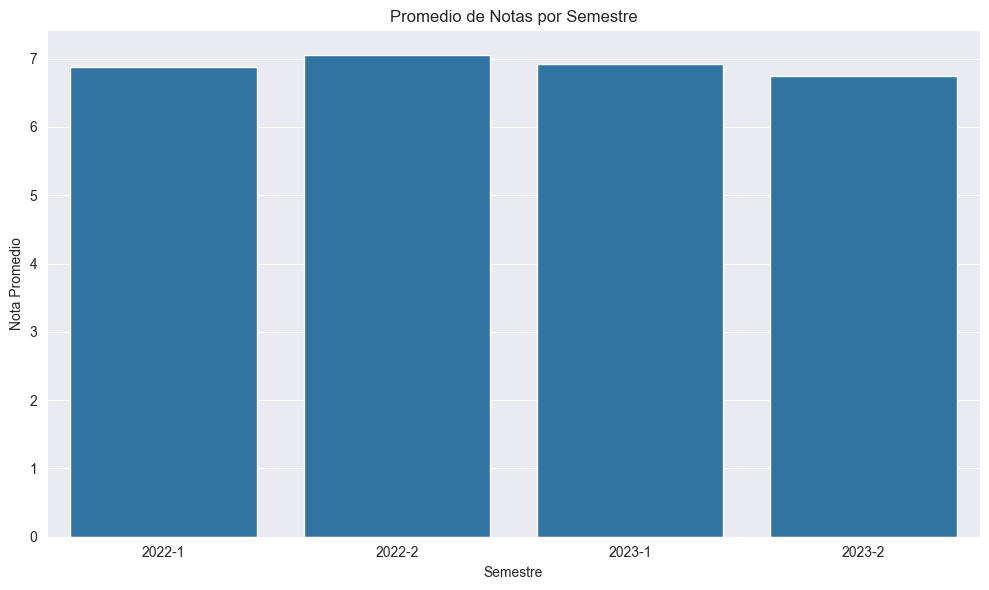

In [11]:
# Distribución de Notas
plt.figure(figsize=(10, 6))
notas['Nota'].hist(bins=20, edgecolor='black')
plt.title('Distribución de Notas')
plt.xlabel('Nota')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('distribucion_notas.png')
plt.show()

# Diagrama de Caja de Notas por Programa
plt.figure(figsize=(12, 6))
sns.boxplot(x='Programa', y='Nota', data=notas_con_programa)
plt.title('Distribución de Notas por Programa')
plt.xlabel('Programa')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('notas_por_programa.png')
plt.show()

# Promedio de notas por semestre
notas_semestre = notas.groupby('Semestre')['Nota'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Semestre', y='Nota', data=notas_semestre)
plt.title('Promedio de Notas por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Nota Promedio')
plt.tight_layout()
plt.savefig('notas_por_semestre.png')
plt.show()

# 9. Visualización de Datos - Parte 3: Análisis de Correlaciones y Relaciones

Esta sección crea visualizaciones más avanzadas que exploran relaciones entre variables:

1. **Gráfico de Dispersión de Edad vs. Promedio de Notas**:
   - Explora la relación entre la edad de los estudiantes y su rendimiento académico
   - Diferencia por programa mediante colores, permitiendo detectar patrones específicos por área de estudio

2. **Matriz de Correlación**:
   - Visualiza las correlaciones entre variables numéricas (Edad, Nota, Año de Ingreso)
   - Permite identificar relaciones lineales significativas entre estas variables

3. **Diagrama de Caja de Notas por Género**:
   - Compara la distribución de notas entre diferentes géneros
   - Facilita la detección de posibles diferencias de rendimiento por género

Estas visualizaciones más complejas ayudan a descubrir relaciones subyacentes en los datos que podrían no ser evidentes en análisis más simples.

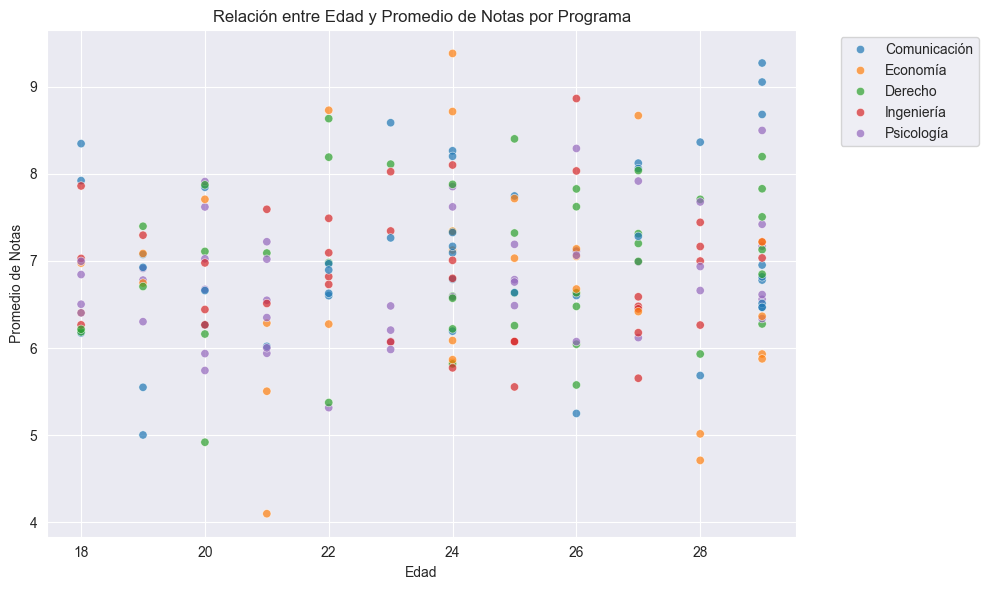

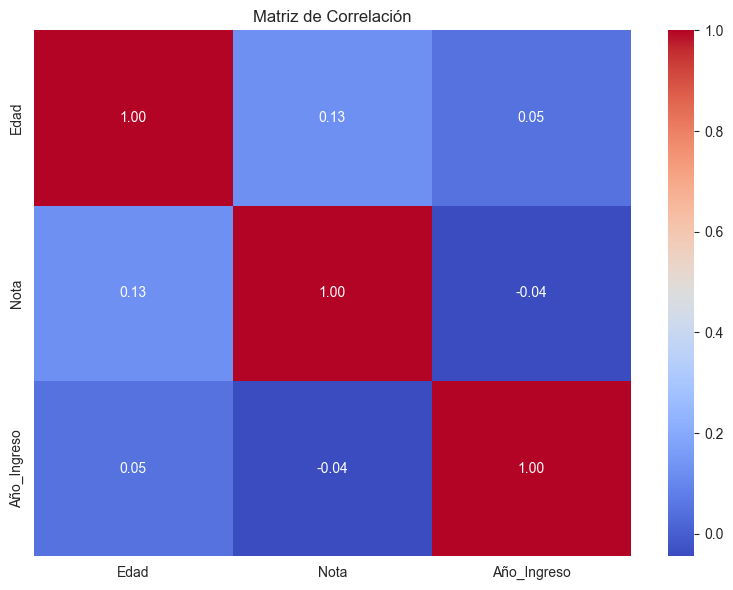

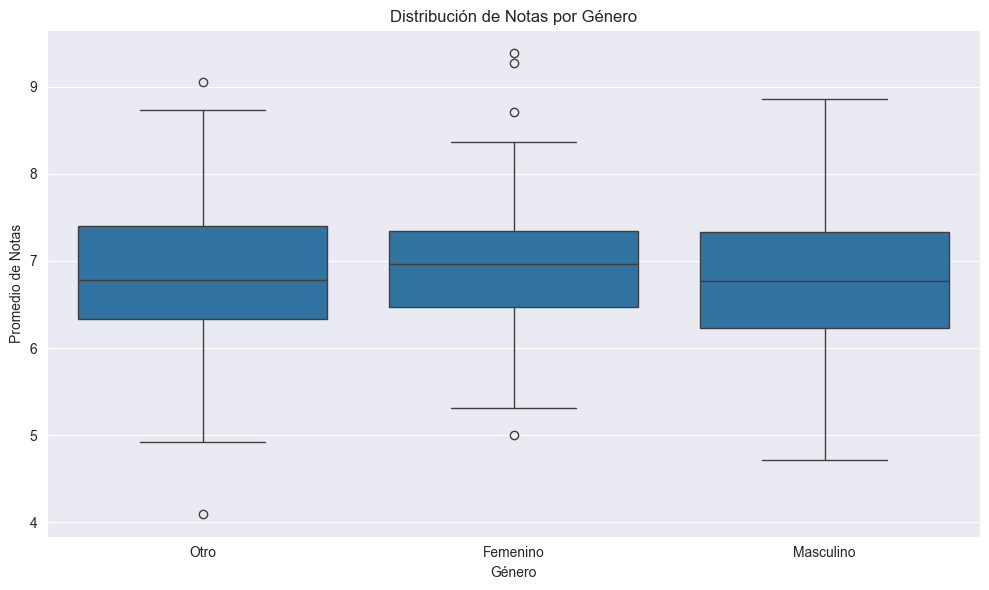

In [12]:
# Relación entre Edad y Promedio de Notas
notas_por_estudiante = notas.groupby('ID_Estudiante')['Nota'].mean().reset_index()
estudiantes_notas = estudiantes.merge(notas_por_estudiante, on='ID_Estudiante')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Edad', y='Nota', hue='Programa', data=estudiantes_notas, alpha=0.7)
plt.title('Relación entre Edad y Promedio de Notas por Programa')
plt.xlabel('Edad')
plt.ylabel('Promedio de Notas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('relacion_edad_notas.png')
plt.show()

# Matriz de correlación
# Crear un dataframe con variables numéricas para la correlación
df_corr = estudiantes_notas[['Edad', 'Nota', 'Año_Ingreso']]
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('matriz_correlacion.png')
plt.show()

# Distribución de notas por género
plt.figure(figsize=(10, 6))
sns.boxplot(x='Género', y='Nota', data=estudiantes_notas)
plt.title('Distribución de Notas por Género')
plt.xlabel('Género')
plt.ylabel('Promedio de Notas')
plt.tight_layout()
plt.savefig('notas_por_genero.png')
plt.show()

# 10. Resumen de Hallazgos

Esta sección final presenta un resumen estructurado de los principales hallazgos del análisis:

1. **Distribución de Estudiantes**:
   - Total de estudiantes analizados
   - Distribución por programa académico
   - Rango y promedio de edades

2. **Análisis de Notas**:
   - Estadísticas generales (media, mínimo, máximo, desviación estándar)
   - Comparación de rendimiento entre diferentes programas académicos

3. **Observaciones Importantes**:
   - Patrones identificados en la distribución de notas
   - Variaciones en el rendimiento entre programas
   - Relación (o falta de ella) entre edad y rendimiento académico

4. **Limitaciones**:
   - Aclaración sobre la naturaleza sintética de los datos
   - Advertencia sobre la interpretación de los resultados

Este resumen proporciona una visión consolidada de todo el análisis realizado y destaca los puntos más relevantes.

In [13]:
# Resumen de hallazgos
print("RESUMEN DE HALLAZGOS DEL ANÁLISIS DE DATOS DE ESTUDIANTES DE DEUSTO")
print("=" * 70)

print("\n1. DISTRIBUCIÓN DE ESTUDIANTES:")
print(f"   - Total de estudiantes: {len(estudiantes)}")
print(f"   - Distribución por programa: {estudiantes['Programa'].value_counts().to_dict()}")
print(f"   - Rango de edades: {estudiantes['Edad'].min()} - {estudiantes['Edad'].max()} años")
print(f"   - Edad promedio: {estudiantes['Edad'].mean():.2f} años")

print("\n2. ANÁLISIS DE NOTAS:")
print(f"   - Nota promedio general: {notas['Nota'].mean():.2f}")
print(f"   - Nota mínima: {notas['Nota'].min():.2f}")
print(f"   - Nota máxima: {notas['Nota'].max():.2f}")
print(f"   - Desviación estándar: {notas['Nota'].std():.2f}")

print("\n   Notas promedio por programa:")
for programa, nota in notas_con_programa.groupby('Programa')['Nota'].mean().items():
    print(f"   - {programa}: {nota:.2f}")

print("\n3. OBSERVACIONES IMPORTANTES:")
print("   - La distribución de notas sigue aproximadamente una distribución normal")
print("   - Se observa variación en el rendimiento entre diferentes programas")
print("   - No se observa una correlación fuerte entre la edad y el rendimiento académico")

print("\n4. LIMITACIONES:")
print("   - Este es un conjunto de datos sintético generado aleatoriamente")
print("   - Las conclusiones son ilustrativas y no representan datos reales de la Universidad de Deusto")

RESUMEN DE HALLAZGOS DEL ANÁLISIS DE DATOS DE ESTUDIANTES DE DEUSTO

1. DISTRIBUCIÓN DE ESTUDIANTES:
   - Total de estudiantes: 200
   - Distribución por programa: {'Psicología': 47, 'Comunicación': 43, 'Derecho': 42, 'Ingeniería': 37, 'Economía': 31}
   - Rango de edades: 18.0 - 29.0 años
   - Edad promedio: 24.00 años

2. ANÁLISIS DE NOTAS:
   - Nota promedio general: 6.90
   - Nota mínima: 0.06
   - Nota máxima: 10.00
   - Desviación estándar: 1.88

   Notas promedio por programa:
   - Comunicación: 7.05
   - Derecho: 6.97
   - Economía: 6.73
   - Ingeniería: 6.85
   - Psicología: 6.82

3. OBSERVACIONES IMPORTANTES:
   - La distribución de notas sigue aproximadamente una distribución normal
   - Se observa variación en el rendimiento entre diferentes programas
   - No se observa una correlación fuerte entre la edad y el rendimiento académico

4. LIMITACIONES:
   - Este es un conjunto de datos sintético generado aleatoriamente
   - Las conclusiones son ilustrativas y no representan d